# Prüfungsleistung Data Science

Matthias Hagg, 4392350, T-INF19E

---

# Themengebiet

ARIMA Modell zum Klimawandel

---

## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
import pandas as pd
import statistics
import copy
from datetime import datetime
from matplotlib.pyplot import figure

# Auswahl Liste 1985 bis 2021 oder 2019 bis 2020
daten_groß = pd.read_csv("Daten/climatechange_basel.csv", sep = ';')           # 1985 bis 2021
daten_klein = pd.read_csv("Daten/climatechange_basel_2_Jahre.csv", sep = ';')  # 2019 bis 2020

sns.set()

---

## Task 1

### Performa an EDA and plot the data. What can you see now?

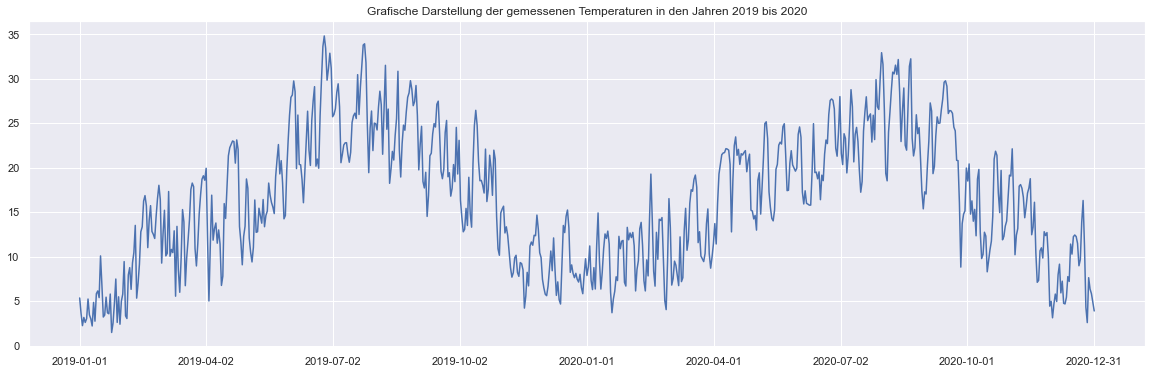

In [6]:
daten_lokal_1=copy.deepcopy(daten_klein)

daten_lokal_1["timestamp"]=daten_lokal_1["timestamp"].str[0:10]
plt.figure(figsize=(20, 6))
plt.plot(daten_lokal_1["timestamp"], daten_lokal_1["Basel Temperature [2 m elevation corrected]"])
plt.xticks(np.arange(0, 731, step=91.25))
plt.title("Grafische Darstellung der gemessenen Temperaturen in den Jahren 2019 bis 2020")
plt.show()

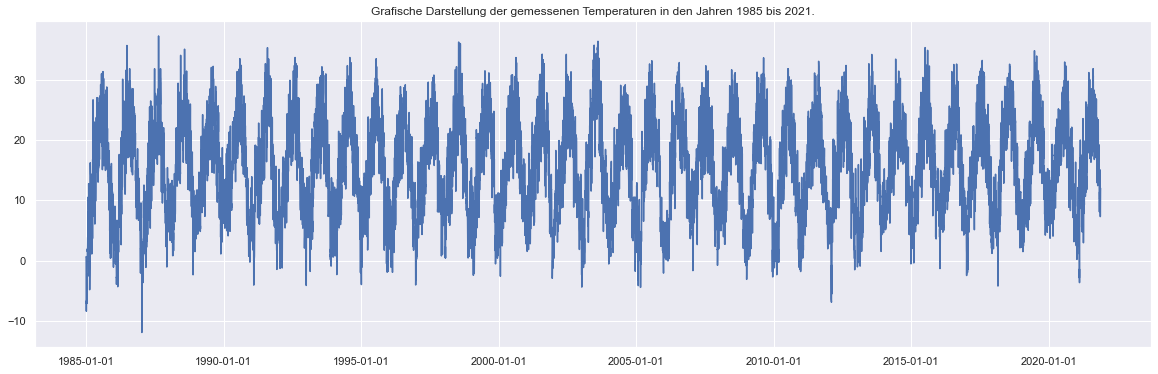

In [7]:
#daten_groß = pd.read_csv("Daten/climatechange_basel.csv", sep = ';') #Nur notwendig, da im nachträglichen ausführen ein Fehler auftitt
daten_lokal_2=copy.deepcopy(daten_groß)

daten_lokal_2["timestamp"]=daten_lokal_2["timestamp"].str[0:10]
plt.figure(figsize=(20, 6))
plt.plot(daten_lokal_2["timestamp"], daten_lokal_2["Basel Temperature [2 m elevation corrected]"])
plt.xticks(np.arange(0, 13473, step=1826.15))
plt.title("Grafische Darstellung der gemessenen Temperaturen in den Jahren 1985 bis 2021.")
plt.show()

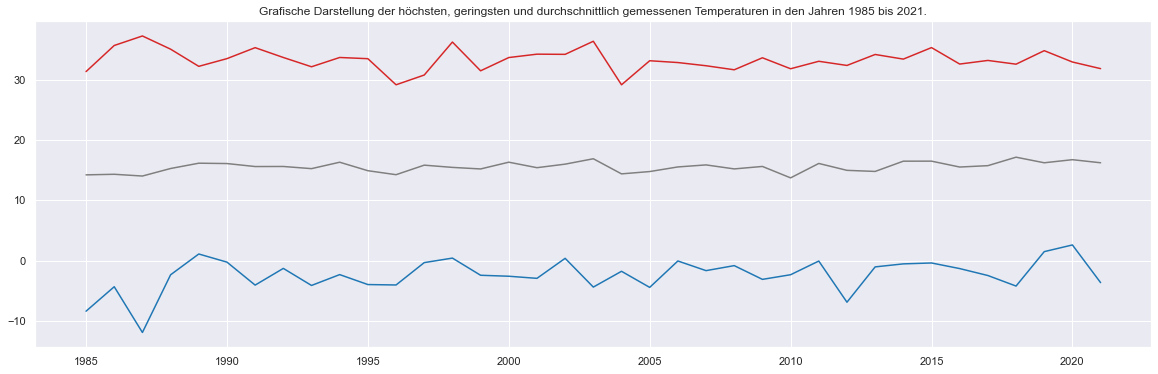

In [10]:
daten_lokal_3=copy.deepcopy(daten_groß)

startjahr=1985

jahre=[]
temp_min=[]
temp_max=[]
temp_schnitt=[]

daten_lokal_3["timestamp"]=daten_lokal_3["timestamp"].str[0:4]
jahresgruppen = daten_lokal_3.groupby(["timestamp"])

while startjahr <= 2021:
    jahre.append(startjahr)
    gruppendatensatz=jahresgruppen.get_group(str(startjahr))
    temp_min.append(min((gruppendatensatz["Basel Temperature [2 m elevation corrected]"])))
    temp_max.append(max((gruppendatensatz["Basel Temperature [2 m elevation corrected]"])))
    temp_schnitt.append(statistics.mean(gruppendatensatz["Basel Temperature [2 m elevation corrected]"]))
    startjahr=startjahr+1

plt.figure(figsize=(20, 6))
plt.title("Grafische Darstellung der höchsten, geringsten und durchschnittlich gemessenen Temperaturen in den Jahren 1985 bis 2021.")
plt.plot(jahre, temp_min, color = 'tab:blue')
plt.plot(jahre, temp_max, color = 'tab:red')
plt.plot(jahre, temp_schnitt, color = 'tab:grey')
plt.show()

---

## Task 2

### Is Temperature a Random Walk (with Drift)?

An ARMA model is a simplistic approach to forecasting climate changes, but it illustrates many of the topics covered in this class.
Plot the data and test whether it follows a random walk (with drift).

---

## Task 3

### Look at Autocorrelations

If the temperature series is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

---

## Task 4

### Which ARMA Model is Best?

Recall from theory that the Akaike Information Criterion (AIC) can be used to compare models with different numbers of parameters. It measures goodness-of-fit, but places a penalty on models with more parameters to discourage overfitting. Lower AIC scores are better.

Fit the temperature data to an AR(1), AR(2), and ARMA(1,1) and see which model is the best fit, using the AIC criterion. The AR(2) and ARMA(1,1) models have one more parameter than the AR(1) has.

---

## Task 5

### Don't Throw Out That Winter Coat Yet?

Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. In this exercise, you will use the ARIMA module on the temperature data (before differencing), which is identical to using the ARMA module on changes in temperature, followed by taking cumulative sums of these changes to get the temperature forecast.

---

## Task 6

Diese Task wirklich gewollt?
Provide the conclusion of your whole research. Is it possible to perfume here A/B Test? What would be here Null-Hypothese and how to test it? What it will show?